# EL desafio del cubano: "Mantener una alimentacion saludable":  

## Introduccion


Una [alimentacion saludable](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) ayuda a protegernos de la malnutrición en todas sus formas, así como de las enfermedades no transmisibles, entre ellas la diabetes, las cardiopatías, los accidentes cerebrovasculares y el cáncer.
Para una alimentacion saludable se basa en consumir los nutrientes que necesita el cuerpo. La composición exacta varía según las características individuales de cada persona (edad, sexo, estilo de vida y grado de actividad física). Sin embargo, los principios básicos de una alimentación saludable siguen siendo los mismos para todos.



Los [macronutrientes](https://www.fundacionparalasalud.org/infantil/202/macronutrientes) son aquellas sustancias necesarias en grandes cantidades (proteina, grasas y carbohidrato) que proporcionan energía al organismo para un buen funcionamiento, para reparar y construir estructuras orgánicas y para promover el crecimiento. Los [micronutrientes](https://www.paho.org/es/temas/micronutrientes) son pequeñas cantidades de vitaminas y minerales requeridos por el cuerpo para la mayoría de las funciones celulares.

Tipos de nutrientes
1) Macronutrientes
2) Micronutrientes

En este proyecto se analizará de forma detallada el costo económico de los alimentos de consumo frecuente que se venden en las Mipymes de Cuba, con el objetivo de entender cómo sus precios afectan la alimentación cotidiana de la población.



In [1]:
import importlib 
import json
import src.graficos as gr
import src.funciones as fn

mipyme = fn.cargar_json("Data/mipymes.json")
nutrientes = fn.cargar_json("Data/valor_nutricional.json")
productos = ['muslo de pollo', 'pechuga de pollo', 'higado de pollo', 'picadillo de pollo', 'huevo', 'molleja de pollo', 'lomo de cerdo', 'atún', 'pierna de cerdo', 'solmillo de cerdo', 'garbanzos', 'frijoles negros', 'frijoles colorados', 'leche de vaca', 'arroz', 'codito', 'espaguetis']

proteina = []
grasas = []
carbohidratos = []

for producto in nutrientes:
    proteina.append(nutrientes[producto]["proteina"])
    grasas.append(nutrientes[producto]["grasas"])       
    carbohidratos.append(nutrientes[producto]["carbohidratos"])


En este análisis se examinan 17 alimentos de consumo frecuente disponibles en las Mipymes cubanas, incluyendo productos de origen animal y de origen vegetal, que pertenecen a los grupos de alimentos que la [OMS](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) reconoce como necesarios para una alimentacion saludable con el propósito de evaluar la relación costo-beneficio nutricional de cada producto.

In [2]:
for i in nutrientes:
    print(i)

muslo de pollo
Pechuga de pollo
higado de pollo
picadillo de pollo
huevo
molleja de pollo
lomo de cerdo
atún
pierna de cerdo
solmillo de cerdo
garbanzos
frijoles negros
frijoles colorados
leche de vaca
arroz
codito
espaguetis


El Siguiente grafico muestra el precio promedio que una persona debe gastar en comprar 1 libra de los producto. Pero el peso escurrido de las diferentes latas de atún de todas las mipymes nunca llega a 1 libra, por eso el análisis se basa en el precio promedio para comprar 1 lata. En el caso de la leche, todos los envases son en una caja que contiene 1 litro de leche aproximadamente de 1030g que son aproximadamente 2,27 libras (1034/453.592). Por tanto el resultado de la funcion de la leche es el promedio de costo de un envace de 1 litro de leche. El resultado del huevo es el promedio para comprar un cartón de 30 unidades.

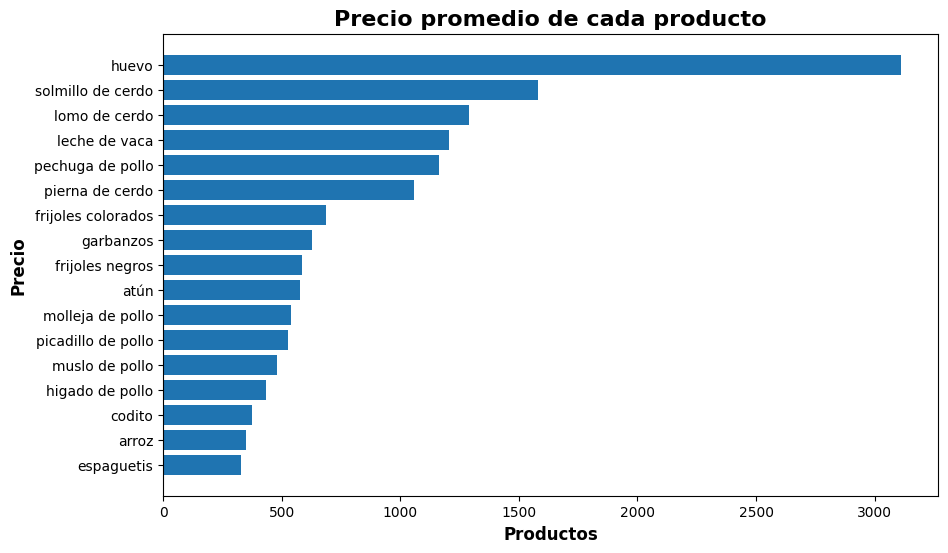

In [3]:
precio = fn.precio_promedio_lb(productos,mipyme)

claves_ordenados = sorted(precio, key=precio.get)
valores_ordenados = [precio[i] for i in claves_ordenados]


gr.barra_costo_promedio(claves_ordenados,valores_ordenados)

### Requisitos para una dieta saludable

Consumir las proporciones correctas de macronutrientes diarios es clave para una alimentación saludable, por lo que en esta sección se presentará un gráfico de pastel que muestre visualmente qué porcentaje aproximado de la energía diaria, entendida como el total de kilocalorías consumidas en el día, debería provenir de carbohidratos, grasas y proteínas en la dieta de un adulto. Esta explicación es una adaptación al contexto cubano de los conceptos sobre macronutrientes por [OMS/FON](https://iris.who.int/server/api/core/bitstreams/f06e1673-3689-4cb1-8a37-762a3e9c5360/content)




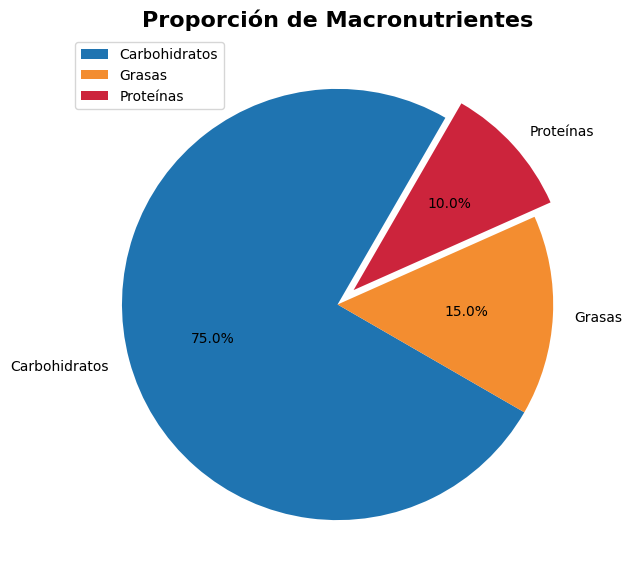

In [4]:
gr.proporcion_macronutrientes()

A continuación el usuario puede ingresar la cantidad de gramos de kilocalorías que necesita, y el programa calcula automáticamente cuántos gramos de proteínas, grasas y carbohidratos debe consumir diario para mantener el balance de nutrientes recomendado.


In [5]:
resultado = fn.calcular_macronutrientes(2600)
for clave, valor in resultado.items(): # para mostrar los resultados de forma mas clara
    print(f"{clave}: {valor} g")


carbohidratos_g: 481.0 g
grasas_g: 43.33 g
proteinas_g: 65.0 g


El siguiente gráfico muestra el costo promedio, en CUP, de obtener 1 gramo de cada macronutriente (proteínas, grasas y carbohidratos) a partir de cada producto analizado.
Para cada producto, la altura de cada segmento de la barra apilada representa el precio promedio por gramo de ese macronutriente.
Por lo tanto, mientras más alta es la barra asociada a un macronutriente en un producto, más costoso resulta obtener 1 gramo de ese macronutriente a partir de dicho producto. En consecuencia, para cubrir las necesidades diarias de macronutrientes, los productos con barras más altas implican un mayor gasto económico.
Además, es posible comparar directamente los precios por gramo de un mismo macronutriente entre diferentes productos: observando todos los segmentos de proteína (del mismo color) en todos los productos, se puede identificar cuál producto ofrece la proteína más barata por gramo. De igual manera, comparando los segmentos de grasas entre todos los productos se identifica cuál es la fuente más económica de grasas, y así sucesivamente con los carbohidratos. Esta comparación es fundamental para optimizar el presupuesto nutricional: si necesitas proteína económica, eliges el producto con el segmento de proteína más bajo; si necesitas carbohidratos baratos, identificas el producto con el segmento de carbohidratos más bajo, y así para cada macronutriente.

Valor promedio de las proteina>> {'muslo de pollo': 5.22, 'pechuga de pollo': 8.64, 'higado de pollo': 5.79, 'picadillo de pollo': 6.86, 'huevo': 17.05, 'molleja de pollo': 6.04, 'lomo de cerdo': 6.82, 'atún': 20.96, 'pierna de cerdo': 5.52, 'solmillo de cerdo': 6.9, 'garbanzos': 5.54, 'frijoles negros': 5.57, 'frijoles colorados': 6.13, 'leche de vaca': 36.33, 'arroz': 12.25, 'codito': 5.98, 'espaguetis': 6.49}
Valor promedio de las grasas>> {'muslo de pollo': 13.04, 'pechuga de pollo': 66.22, 'higado de pollo': 19.67, 'picadillo de pollo': 18.29, 'huevo': 20.46, 'molleja de pollo': 54.4, 'lomo de cerdo': 37.48, 'atún': 26.41, 'pierna de cerdo': 8.46, 'solmillo de cerdo': 72.48, 'garbanzos': 25.41, 'frijoles negros': 122.46, 'frijoles colorados': 137.85, 'leche de vaca': 27.24, 'arroz': 42.87, 'codito': 44.86, 'espaguetis': 42.15}
Valor promedio de las carbohidrato>> {'muslo de pollo': 0, 'pechuga de pollo': 0, 'higado de pollo': 98.36, 'picadillo de pollo': 7.31, 'huevo': 0, 'molleja

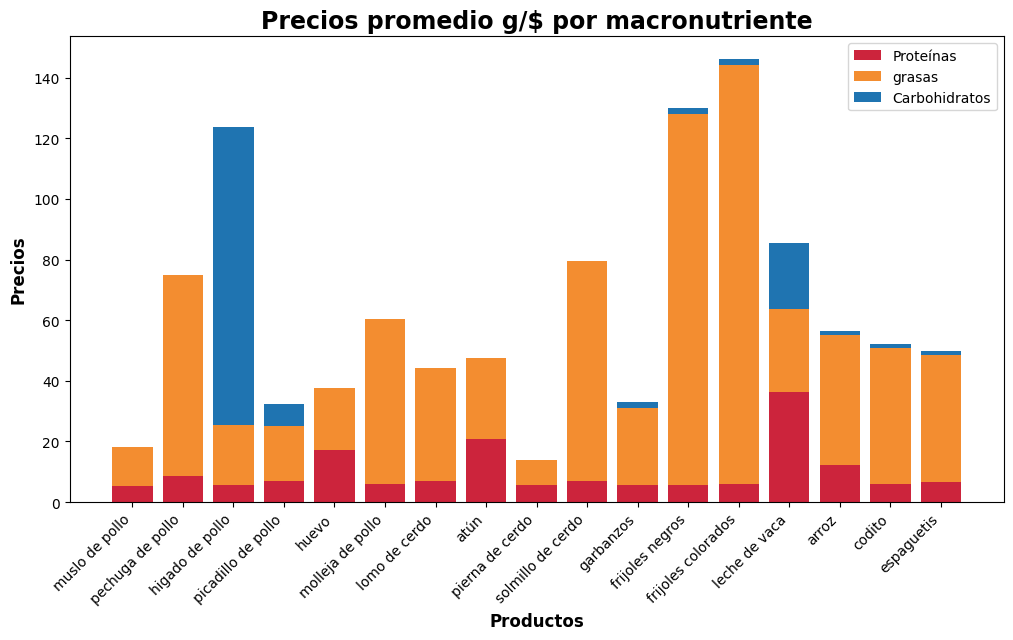

In [9]:
import matplotlib.pyplot as plt

protein = fn.costo_promedio_nutr(mipyme, productos,proteina)
gras = fn.costo_promedio_nutr(mipyme, productos, grasas)
car = fn.costo_promedio_nutr(mipyme, productos,carbohidratos)

print(f"Valor promedio de las proteina>> {protein}")
print(f"Valor promedio de las grasas>> {gras}")
print(f"Valor promedio de las carbohidrato>> {car}")

p = list(protein.values())
g = list(gras.values())
c = list(car.values())


gr.barra_apilada(productos,c,p,g)
 


[Salario medio en La Habana](https://www.onei.gob.cu/sites/default/files/publicaciones/2025-04/salario-medio-en-cifras-2024-edicion-2025.pdf) 6449

Con el salario medio de un cubano, cuales son los alimentos que puede comprar

Evolucion de los precios-Mortalidad

fuente principal de proteina frijoles negros (proteina: 6.56cup, )
fuente principal de grasas: muslo de pollo (grasas 12.85 cup) 
carboidratos: arroz 1.14cup

